In [4]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

--2023-08-18 22:46:12--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 9386 (9,2K) [text/plain]
Sauvegarde en : « seeds.csv.3 »

seeds.csv.3         100%[===================>]   9,17K  --.-KB/s    ds 0,001s  

2023-08-18 22:46:12 (10,6 MB/s) — « seeds.csv.3 » sauvegardé [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
195,12.80,13.47,0.8860,5.160,3.126,4.8730
196,12.79,13.53,0.8786,5.224,3.054,5.4830
35,16.12,15.00,0.9000,5.709,3.485,2.2700
20,14.16,14.40,0.8584,5.658,3.129,3.0720
92,18.81,16.29,0.8906,6.272,3.693,3.2370
30,13.16,13.82,0.8662,5.454,2.975,0.8551
58,15.38,14.77,0.8857,5.662,3.419,1.9990
172,11.27,12.97,0.8419,5.088,2.763,4.3090
28,14.11,14.18,0.8820,5.541,3.221,2.7540
85,18.27,16.09,0.8870,6.173,3.651,2.4430


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

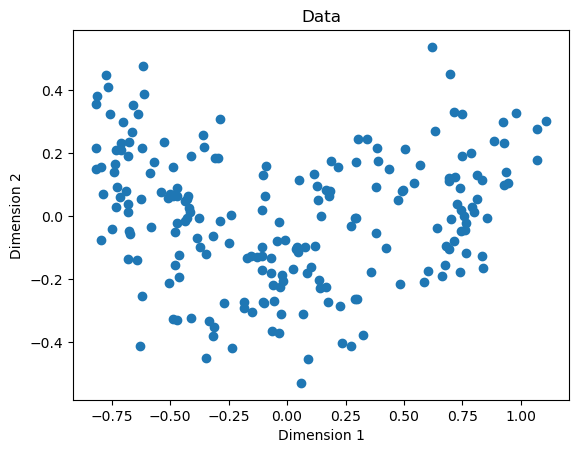

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

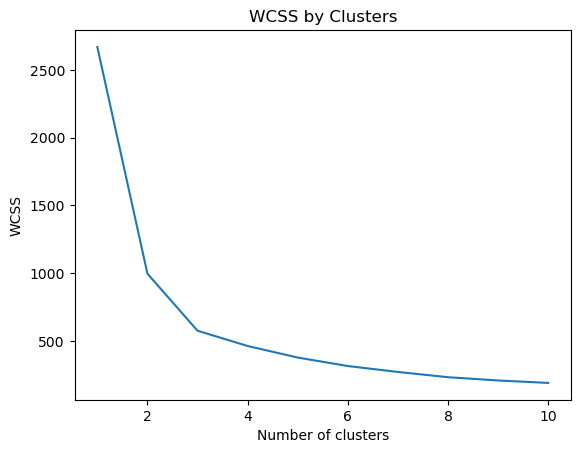

In [7]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Clusturing classification non supervisé avec K-means

---------------------

### Données d'iris

- importation du jeu de donnée 
- identification du nombre de clusters 
- Application des kmeans 
- Visualisation du résultat 

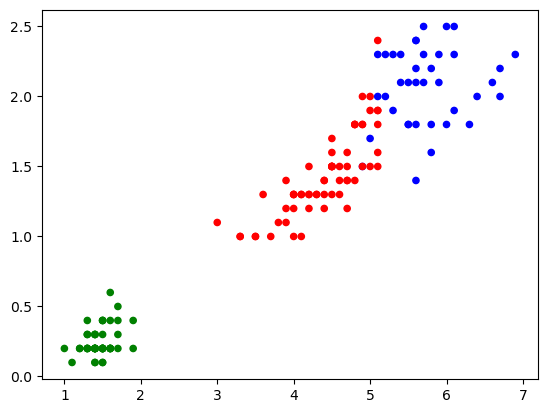

In [18]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn import datasets

# importation au dataset

iris =  datasets.load_iris()

dataset= pd.DataFrame(iris.data) 

dataset.columns = ["Longueur_sepale", "Largeur_sepale", "Longeur_petale", "Largeur_petale"]


# identifier le number de cluster

'''tab=[]

for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset)
    tab.append(kmeans.inertia_)

plt.plot(range (1,11), tab) 
plt.title('la méthode Eblow')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()'''


# Application de Kmeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

# Visualisation 

import numpy as np 
colormap = np.array(["red","green","blue"])
plt.scatter(dataset.Longeur_petale,dataset.Largeur_petale, c=colormap[kmeans.labels_],s=20)


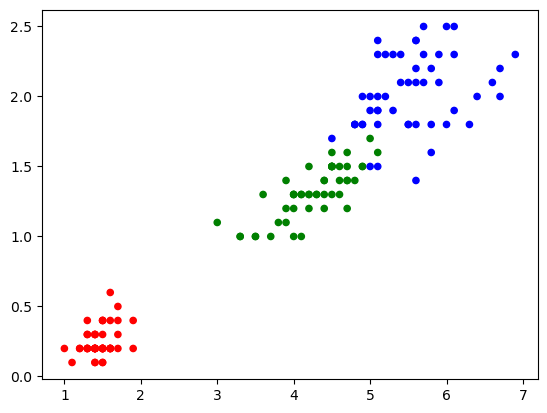

In [19]:
plt.scatter(dataset.Longeur_petale,dataset.Largeur_petale, c=colormap[iris.target],s=20)
